## PCA

#### Import libraries

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la
from mpl_toolkits.mplot3d import Axes3D

#### Import data

In [2]:
Astronomy=pd.read_excel("PCA_exercise 1.xlsx")

In [3]:
del Astronomy["Unnamed: 0"]

In [4]:
Astronomy=Astronomy.rename(columns={"Unnamed: 1": "N° Band"})

In [5]:
Astronomy

,N° Band,Object 1,Object 2,Object 3,Object 4
0,Band 1,375,135,458,475
1,Band 2,57,47,53,73
2,Band 3,245,267,242,227
3,Band 4,1472,1494,1462,1582
4,Band 5,105,66,103,103
5,Band 6,54,41,62,64
6,Band 7,193,209,184,235
7,Band 8,147,93,122,160
8,Band 9,1102,674,957,1137
9,Band 10,720,1033,566,874


<IPython.core.display.Javascript object>


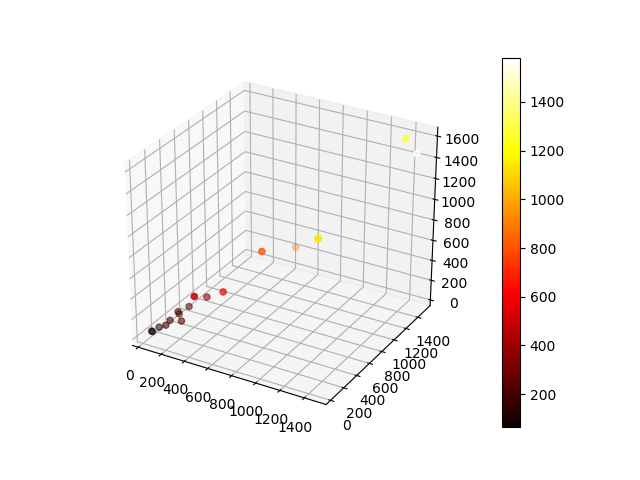

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(Astronomy["Object 1"], Astronomy["Object 2"], Astronomy["Object 3"], c=Astronomy["Object 4"], cmap=plt.hot())
fig.colorbar(img)
plt.show()

### Normalizing the columns

In [7]:
Astronomy_partial=Astronomy[["Object 1","Object 2","Object 3","Object 4"]]

In [8]:
Astronomy_norm=(Astronomy_partial-Astronomy_partial.mean())/Astronomy_partial.std()

In [9]:
#Astronomy_norm["N° Band"]=Astronomy["N° Band"]

In [10]:
Astronomy_norm

,Object 1,Object 2,Object 3,Object 4
0,-0.209072,-0.614594,-0.004760,-0.062392
1,-0.911521,-0.797967,-0.867204,-0.929034
2,-0.496237,-0.339534,-0.464730,-0.597037
3,2.214159,2.217270,2.133248,2.324107
4,-0.805491,-0.758375,-0.760729,-0.864359
5,-0.918148,-0.810470,-0.848038,-0.948437
6,-0.611103,-0.460394,-0.588240,-0.579790
7,-0.712715,-0.702113,-0.720269,-0.741477
8,1.396843,0.508566,1.057856,1.364765
9,0.553020,1.256645,0.225225,0.797783


### Calculating the covariance matrix

In [11]:
correlation_matrix=Astronomy_norm.corr()

In [12]:
correlation_matrix

,Object 1,Object 2,Object 3,Object 4
Object 1,1.000000,0.947619,0.984917,0.990654
Object 2,0.947619,1.000000,0.940742,0.937061
Object 3,0.984917,0.940742,1.000000,0.964122
Object 4,0.990654,0.937061,0.964122,1.000000


<IPython.core.display.Javascript object>


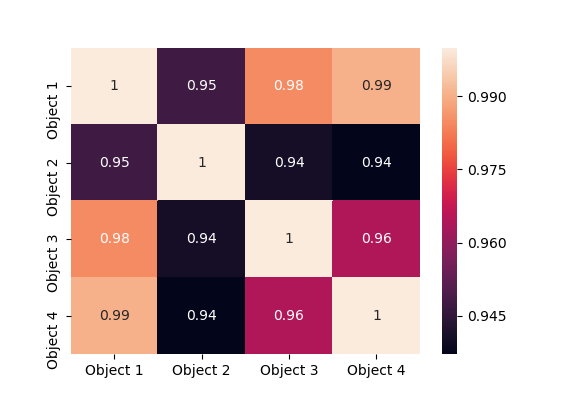

In [13]:
fig = plt.figure()
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns,yticklabels=correlation_matrix.columns,annot=True)


### It is concluded that the Object 2 is not behaving like a star because it has the lowest correlations with the other variables. In other words, different stars should behave in a similar pattern, so the only Object that is not having the same strong relationship with the other Objects is the N°2

### Calculating the eigenvectors

In [14]:
eigvals, eigvecs = la.eig(correlation_matrix)

In [15]:
eigvecs

array([[ 0.50526231,  0.814348  , -0.27858192,  0.06276508],
       [ 0.49247225, -0.01423082,  0.86738491,  0.07008552],
       [ 0.50094821, -0.32963209, -0.22784545, -0.76712452],
       [ 0.50123046, -0.4774699 , -0.34368879,  0.63456169]])

In [16]:
eigvals = eigvals.real

In [17]:
eigvals

array([3.88288882, 0.00392284, 0.07723703, 0.03595131])

It is important to notice which of the PC provide more information. Just by looking the eigenvalues, it can be deduced that the first element is the one providing more information and probably a large percentage. It is necessary to cuantify this information.


In [18]:
import numpy as np
from sklearn.decomposition import PCA

my_model = PCA(n_components=4)
my_model.fit_transform(Astronomy_norm)

print (my_model.explained_variance_ratio_)
print (my_model.explained_variance_ratio_.cumsum())

[0.9707222  0.01930926 0.00898783 0.00098071]
[0.9707222  0.99003146 0.99901929 1.        ]


#### Looking the accumulative variance (last row) I decided to keep only the first two components

#### Sorting and keeping the two best eigenvectors

In [19]:
eigvals_new, eigvecs_new = zip(*sorted(zip(eigvals, eigvecs.T),reverse=True))

In [20]:
eigvals_new

(3.8828888167787783,
 0.07723702932140884,
 0.035951313595057585,
 0.003922840304754855)

In [21]:
eigvecs_new

(array([0.50526231, 0.49247225, 0.50094821, 0.50123046]),
 array([-0.27858192,  0.86738491, -0.22784545, -0.34368879]),
 array([ 0.06276508,  0.07008552, -0.76712452,  0.63456169]),
 array([ 0.814348  , -0.01423082, -0.32963209, -0.4774699 ]))

Keeping the first two eigenvectors

In [22]:
eigvecs_new=np.asarray(eigvecs_new[:2]).T

In [23]:
eigvecs_new

array([[ 0.50526231, -0.27858192],
       [ 0.49247225,  0.86738491],
       [ 0.50094821, -0.22784545],
       [ 0.50123046, -0.34368879]])

### Deriving the new data set 

#### Shapes

In [24]:
eigvecs_new.T.shape

(2, 4)

In [25]:
Astronomy_norm.T.shape

(4, 17)

#### Data adjusting

In [26]:
Astronomy_new=eigvecs_new.T.dot(Astronomy_norm.T)

In [27]:
Astronomy_new.shape

(2, 17)

In [28]:
Dimensional_reduction=pd.DataFrame(Astronomy_new.T,columns=["W1","W2"])
Dimensional_reduction

,W1,W2
0,-0.441964,-0.452318
1,-1.753618,0.078676
2,-0.950000,0.154817
3,4.444235,0.021581
4,-1.594792,0.036992
5,-1.763248,0.071979
6,-1.120785,0.104199
7,-1.438348,0.008495
8,2.170219,-0.658095
9,1.410982,0.610428


<IPython.core.display.Javascript object>


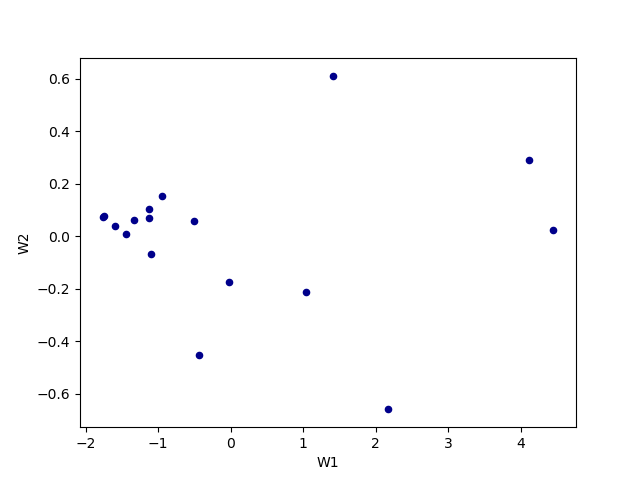

In [29]:
ax1 = Dimensional_reduction.plot.scatter(x="W1",
                      y="W2",
                      c='DarkBlue')
plt.show()

### Get original data back

In [30]:
Astronomy_v1=pd.DataFrame((eigvecs_new.dot(Astronomy_new)).T,columns=["Object 1","Object 2","Object 3","Object 4"])

In [31]:
Astronomy_v1.head()

,Object 1,Object 2,Object 3,Object 4
0,-0.097300,-0.609989,-0.118342,-0.066069
1,-0.907955,-0.795366,-0.896398,-0.906007
2,-0.523128,-0.333562,-0.511175,-0.529378
3,2.239492,2.207381,2.221414,2.220169
4,-0.816094,-0.753305,-0.807337,-0.812072


In [32]:
Original_data=Astronomy_v1*Astronomy_partial.std()+Astronomy_partial.mean()

In [33]:
Original_data

,Object 1,Object 2,Object 3,Object 4
0,425.599158,137.210057,404.662167,473.294376
1,58.614514,48.248159,39.290490,83.681425
2,232.826107,269.865887,220.189589,258.384411
3,1483.468571,1489.254744,1503.402452,1533.787127
4,100.200296,68.433094,81.113298,127.254028
5,57.256443,43.184696,37.741688,82.510140
6,200.145593,208.433180,185.429443,226.746512
7,139.578221,93.544636,120.964882,168.170537
8,1049.043088,668.906102,1041.177759,1113.433659
9,715.401343,1017.499646,726.846275,734.678595


### It can be proved that Object 2 is not a star by plotting the other Objects  in a 3D plane and looking covariance matrix

#### Object 2 as the color 

<IPython.core.display.Javascript object>


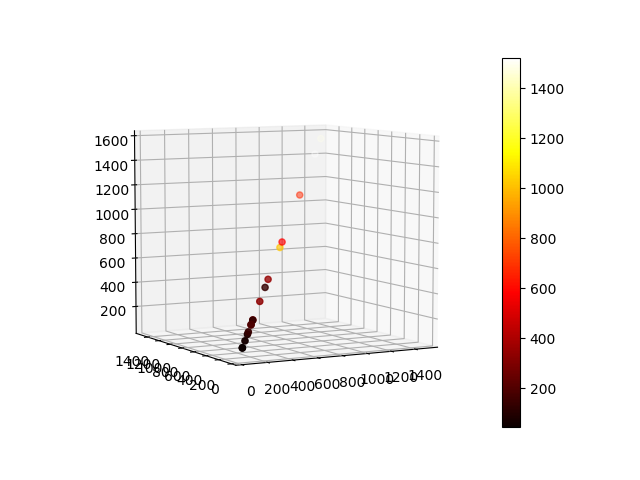

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(Original_data["Object 1"], Original_data["Object 3"], Original_data["Object 4"], c=Original_data["Object 2"], cmap=plt.hot())
fig.colorbar(img)
plt.show()

<IPython.core.display.Javascript object>


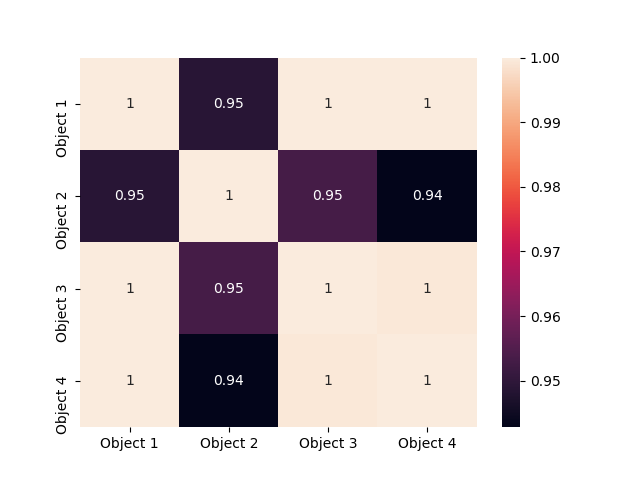

In [63]:
correlation_matrix_original=Original_data.corr()
fig = plt.figure()
sns.heatmap(correlation_matrix_original, xticklabels=correlation_matrix_original.columns,yticklabels=correlation_matrix_original.columns,annot=True)
plt.show()

#### Object 2 as an axis

<IPython.core.display.Javascript object>


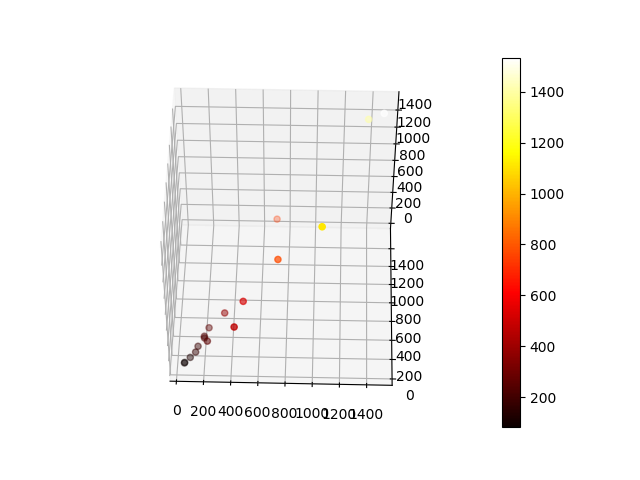

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(Original_data["Object 1"], Original_data["Object 2"], Original_data["Object 3"], c=Original_data["Object 4"], cmap=plt.hot())
fig.colorbar(img)
plt.show()

### TEST WITH TWO DIMENSIONS (Before applying to 4 dimensions)

In [37]:
Two_dim=Astronomy[["Object 1","Object 2"]]

In [38]:
Two_dim

,Object 1,Object 2
0,375,135
1,57,47
2,245,267
3,1472,1494
4,105,66
5,54,41
6,193,209
7,147,93
8,1102,674
9,720,1033


<IPython.core.display.Javascript object>


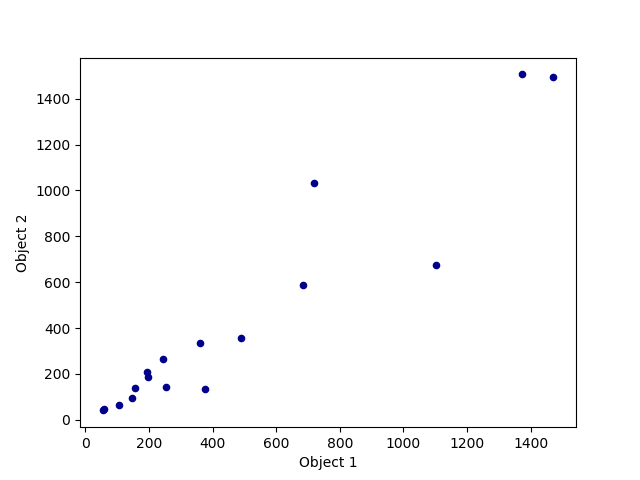

In [39]:
ax1 = Two_dim.plot.scatter(x="Object 1",
                      y="Object 2",
                      c='DarkBlue')
plt.show()

### Normalizing the columns

In [40]:
Two_dim_norm=(Two_dim-Two_dim.mean())/Two_dim.std()

In [41]:
#Astronomy_norm["N° Band"]=Astronomy["N° Band"]

In [42]:
Two_dim_norm

,Object 1,Object 2
0,-0.209072,-0.614594
1,-0.911521,-0.797967
2,-0.496237,-0.339534
3,2.214159,2.217270
4,-0.805491,-0.758375
5,-0.918148,-0.810470
6,-0.611103,-0.460394
7,-0.712715,-0.702113
8,1.396843,0.508566
9,0.553020,1.256645


### Calculating the covariance matrix

In [43]:
correlation_matrix2=Two_dim_norm.cov()

In [44]:
correlation_matrix2

,Object 1,Object 2
Object 1,1.000000,0.947619
Object 2,0.947619,1.000000


### Calculating the eigenvectors

In [45]:
eigvals2, eigvecs2 = la.eig(correlation_matrix2)

In [46]:
eigvecs2

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [47]:
eigvals2 = eigvals.real

In [48]:
eigvals2

array([3.88288882, 0.00392284, 0.07723703, 0.03595131])

Looking the eigenvalues, it is important to notice that the second value (0.05238053) is really small in comparison with the others. Hence, the value with lower significance will be ignored

In [49]:
index_min = np.where(eigvals2 == min(eigvals2))
print(index_min[0][0])

1


In [50]:
eigvals_new2=np.delete(eigvals2,index_min[0][0])
eigvals_new2

array([3.88288882, 0.07723703, 0.03595131])

Erasing the eigenvector related to the lowest eigen value

In [51]:
eigvecs_new2=np.delete(eigvecs2,index_min[0][0],1)
eigvecs_new2

array([[0.70710678],
       [0.70710678]])

<IPython.core.display.Javascript object>


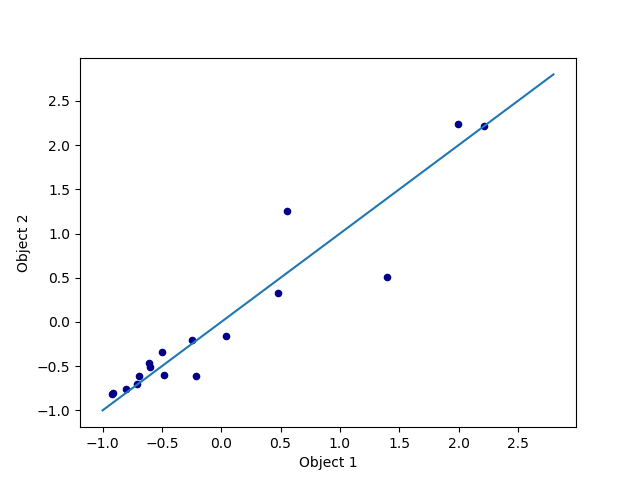

In [52]:
ax1 = Two_dim_norm.plot.scatter(x="Object 1", y="Object 2", c='DarkBlue')
x= np.arange(-1, 3, 0.2)
line=eigvecs_new2.T[0][0]/eigvecs_new2.T[0][1]*x
plt.plot(x,line)
plt.show()

#### With this it is concluded that the Object 2 is not behaving like a star because it has low covariances in the covariance matrix and it also has the lowest eigenvalue.

### Deriving the new data set 

#### Shapes

In [53]:
eigvecs_new2.T.shape

(1, 2)

In [54]:
Two_dim_norm.T.shape

(2, 17)

#### Data adjusting

In [55]:
Two_dim_new=eigvecs_new2.T.dot(Two_dim_norm.T)

In [56]:
Two_dim_new.shape

(1, 17)

In [57]:
Two_dim_new

array([[-0.58241954, -1.20879081, -0.59097933,  3.13349305, -1.10582047,
        -1.22231747, -0.75766244, -1.00043429,  1.34732777,  1.27962621,
        -0.7611924 ,  0.56632133, -0.08175593, -0.78226866, -0.31263091,
         2.99810135, -0.91859746]])

### Get original data back

In [58]:
Astronomy_v1=pd.DataFrame((eigvecs_new2.dot(Two_dim_new)).T,columns=["Object 1","Object 2"])

In [59]:
Astronomy_v1.head()

,Object 1,Object 2
0,-0.411833,-0.411833
1,-0.854744,-0.854744
2,-0.417885,-0.417885
3,2.215714,2.215714
4,-0.781933,-0.781933


In [60]:
Original_data_2dim=Astronomy_v1*Two_dim.std()+Two_dim.mean()

In [61]:
Original_data_2dim

,Object 1,Object 2
0,283.209743,232.304254
1,82.703117,19.752853
2,280.469682,229.399593
3,1472.704120,1493.253582
4,115.664775,54.694574
5,78.373119,15.162746
6,227.113042,172.837729
7,149.399762,90.456080
8,900.937829,887.140317
9,879.265998,864.166622


<IPython.core.display.Javascript object>


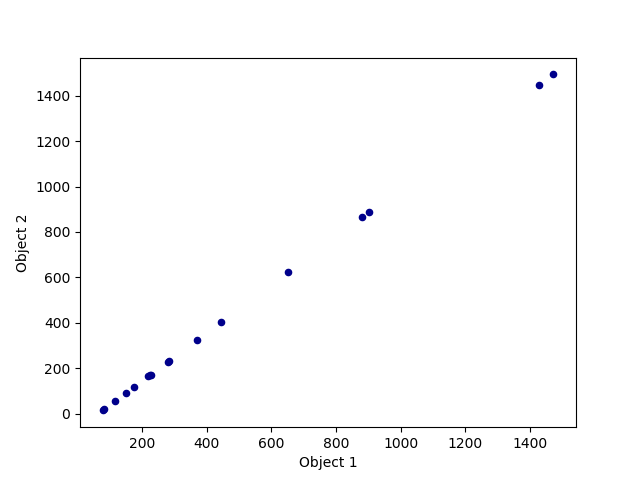

In [62]:
ax1 = Original_data_2dim.plot.scatter(x="Object 1",
                      y="Object 2",
                      c='DarkBlue')
plt.show()